# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

# Saving data

In [3]:
url = "http://www.football-data.co.uk/mmz4281/1819/E0.csv" # the dataset we will be using

In [4]:
### Saving the csv file to my Predictor folder ###

testfile = requests.get(url).content
df = pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("~/Desktop/Bundesliga-Predictor/datasets/E0.csv")

In [5]:
### Reading the csv file ###

df = pd.read_csv("~/Desktop/Bundesliga-Predictor/datasets/E0.csv")
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [6]:
### Head of the csv file ### -- more on the abbreviations in notes.txt 

df.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
309,309,E0,30/03/2019,Man United,Watford,2.0,1.0,H,1.0,0.0,...,2.27,22,-1.00,1.75,1.70,2.28,2.21,1.41,5.22,7.95
310,310,E0,30/03/2019,West Ham,Everton,0.0,2.0,A,0.0,2.0,...,2.04,20,-0.25,2.22,2.16,1.78,1.73,2.77,3.35,2.78
311,311,E0,31/03/2019,Cardiff,Chelsea,1.0,2.0,A,0.0,0.0,...,2.06,22,1.50,1.71,1.67,2.34,2.25,9.28,4.70,1.42
312,312,E0,31/03/2019,Liverpool,Tottenham,2.0,1.0,H,1.0,0.0,...,2.21,22,-1.00,2.09,2.03,1.90,1.84,1.58,4.42,6.04
313,313,E0,01/04/2019,Arsenal,Newcastle,NaN,NaN,NaN,NaN,NaN,...,2.36,21,-1.50,2.18,2.10,1.81,1.77,NaN,NaN,NaN


# Cleaning the data

In [7]:
### Removing betting data ###
# Bonus: Add betting data as the input to improve your model

import warnings
warnings.filterwarnings('ignore')

bet_16 = df.ix[:,23:] ## for future purposes

NUMBEROFTEAMS = 20 # constant for the number of teams in the Premier League
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1) # division and date aren't important

### Creating a feature table ###

feature_table = df.ix[:,:23]

In [8]:
res_16.tail(10)

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
304,304,Brighton,Southampton,0.0,1.0,A,0.0,0.0,D,M Oliver,...,8.0,1.0,2.0,8.0,10.0,6.0,5.0,1.0,2.0,0.0
305,305,Burnley,Wolves,2.0,0.0,H,1.0,0.0,H,C Kavanagh,...,8.0,1.0,1.0,12.0,10.0,1.0,5.0,1.0,1.0,0.0
306,306,Crystal Palace,Huddersfield,2.0,0.0,H,0.0,0.0,D,L Probert,...,15.0,5.0,5.0,10.0,7.0,5.0,5.0,0.0,0.0,0.0
307,307,Fulham,Man City,0.0,2.0,A,0.0,2.0,A,K Friend,...,24.0,0.0,7.0,4.0,12.0,0.0,11.0,2.0,0.0,0.0
308,308,Leicester,Bournemouth,2.0,0.0,H,1.0,0.0,H,L Mason,...,8.0,4.0,2.0,6.0,12.0,6.0,1.0,0.0,2.0,0.0
309,309,Man United,Watford,2.0,1.0,H,1.0,0.0,H,S Attwell,...,20.0,5.0,8.0,14.0,9.0,3.0,5.0,1.0,2.0,0.0
310,310,West Ham,Everton,0.0,2.0,A,0.0,2.0,A,P Tierney,...,17.0,1.0,9.0,7.0,14.0,4.0,9.0,1.0,1.0,0.0
311,311,Cardiff,Chelsea,1.0,2.0,A,0.0,0.0,D,C Pawson,...,21.0,3.0,3.0,8.0,14.0,2.0,7.0,2.0,3.0,0.0
312,312,Liverpool,Tottenham,2.0,1.0,H,1.0,0.0,H,M Atkinson,...,11.0,3.0,2.0,5.0,8.0,10.0,3.0,0.0,1.0,0.0
313,313,Arsenal,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
### Creating a new table which will be used to train the model ###

# Team, Home Goals Scored, Away Goals Scored, Home Attacking Strength, Away Attacking Strength, 
# Home Goals Conceded, Away Goals Conceded, Home Defensive Strength, Away Defensive Strength
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table = table[:-10]
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [10]:
### Data analysis for Home Goals Scored, AGS, Home Goals Conceded, AGC ###

avg_HGS = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_AGS = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_HGC = avg_AGS # HGC = AGS
avg_AGC = avg_HGS # AGC = HGS
print("Average number of goals at home",avg_HGS)
print("Average number of goals away", avg_AGS)
print("Average number of goals conceded at home",avg_HGC)
print("Average number of goals conceded away",avg_AGC)

Average number of goals at home 1.5732484076433122
Average number of goals away 1.2484076433121019
Average number of goals conceded at home 1.2484076433121019
Average number of goals conceded away 1.5732484076433122


In [11]:
### Grouping by HomeTeam and AwayTeam ###
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

### List of Arsenal home games ###
list(res_home)[0][1]

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
7,7,Arsenal,Man City,0.0,2.0,A,0.0,1.0,A,M Oliver,...,17.0,3.0,8.0,11.0,14.0,2.0,9.0,2.0,2.0,0.0
20,20,Arsenal,West Ham,3.0,1.0,H,1.0,1.0,D,G Scott,...,13.0,10.0,5.0,16.0,13.0,10.0,2.0,1.0,3.0,0.0
58,58,Arsenal,Everton,2.0,0.0,H,0.0,0.0,D,J Moss,...,9.0,5.0,6.0,17.0,12.0,5.0,9.0,2.0,1.0,0.0
60,60,Arsenal,Watford,2.0,0.0,H,0.0,0.0,D,A Taylor,...,13.0,2.0,4.0,11.0,17.0,6.0,6.0,2.0,2.0,0.0
89,89,Arsenal,Leicester,3.0,1.0,H,1.0,1.0,D,C Kavanagh,...,8.0,6.0,2.0,10.0,10.0,6.0,4.0,2.0,2.0,0.0
100,100,Arsenal,Liverpool,1.0,1.0,D,0.0,0.0,D,A Marriner,...,13.0,4.0,4.0,7.0,7.0,5.0,8.0,1.0,1.0,0.0
116,116,Arsenal,Wolves,1.0,1.0,D,0.0,1.0,A,S Attwell,...,12.0,3.0,5.0,9.0,16.0,11.0,2.0,2.0,2.0,0.0
137,137,Arsenal,Tottenham,4.0,2.0,H,1.0,2.0,A,M Dean,...,11.0,7.0,6.0,15.0,17.0,8.0,5.0,3.0,3.0,0.0
150,150,Arsenal,Huddersfield,1.0,0.0,H,0.0,0.0,D,P Tierney,...,6.0,2.0,0.0,13.0,20.0,7.0,1.0,5.0,4.0,0.0
171,171,Arsenal,Burnley,3.0,1.0,H,1.0,0.0,H,K Friend,...,7.0,6.0,2.0,10.0,14.0,1.0,3.0,2.0,5.0,0.0


In [12]:
### Adding HGS, HGC, AGS, AGC to the table ###

table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values

### Adding the the team to the table ### -- implemented in a strange manner

teams = []
i = 0
while i < NUMBEROFTEAMS:
    x = list(res_home.HomeTeam)[i][0]
    teams.append(x)
    i+=1
    
    
table.Team = teams
table # HAS, AAS, HDS, ADS still missing

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,37.0,26.0,NaN,NaN,12.0,27.0,NaN,NaN
1,Bournemouth,28.0,15.0,NaN,NaN,21.0,37.0,NaN,NaN
2,Brighton,17.0,15.0,NaN,NaN,16.0,27.0,NaN,NaN
3,Burnley,21.0,16.0,NaN,NaN,28.0,31.0,NaN,NaN
4,Cardiff,19.0,9.0,NaN,NaN,33.0,26.0,NaN,NaN
5,Chelsea,29.0,23.0,NaN,NaN,10.0,24.0,NaN,NaN
6,Crystal Palace,13.0,25.0,NaN,NaN,17.0,24.0,NaN,NaN
7,Everton,23.0,22.0,NaN,NaN,21.0,21.0,NaN,NaN
8,Fulham,19.0,10.0,NaN,NaN,32.0,40.0,NaN,NaN
9,Huddersfield,7.0,11.0,NaN,NaN,24.0,35.0,NaN,NaN


In [13]:
### Computing the number of games each team played ### -- assumming number of home games == number of away games
num_games = res_16.shape[0]/NUMBEROFTEAMS
num_games

15.7

In [14]:
### Completing the Home Attacking Strength, Away Attacking Strength, Home Defensive Strength ###
### Away Defensive Strength ###

table.HAS = (table.HGS / num_games) / avg_HGS
table.AAS = (table.AGS / num_games) / avg_AGS
table.HDS = (table.HGC / num_games) / avg_HGC
table.ADS = (table.AGC / num_games) / avg_AGC
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,37.0,26.0,1.497976,1.326531,12.0,27.0,0.612245,1.093117
1,Bournemouth,28.0,15.0,1.133603,0.765306,21.0,37.0,1.071429,1.497976
2,Brighton,17.0,15.0,0.688259,0.765306,16.0,27.0,0.816327,1.093117
3,Burnley,21.0,16.0,0.850202,0.816327,28.0,31.0,1.428571,1.255061
4,Cardiff,19.0,9.0,0.769231,0.459184,33.0,26.0,1.683673,1.052632
5,Chelsea,29.0,23.0,1.174089,1.173469,10.0,24.0,0.510204,0.971660
6,Crystal Palace,13.0,25.0,0.526316,1.275510,17.0,24.0,0.867347,0.971660
7,Everton,23.0,22.0,0.931174,1.122449,21.0,21.0,1.071429,0.850202
8,Fulham,19.0,10.0,0.769231,0.510204,32.0,40.0,1.632653,1.619433
9,Huddersfield,7.0,11.0,0.283401,0.561224,24.0,35.0,1.224490,1.417004


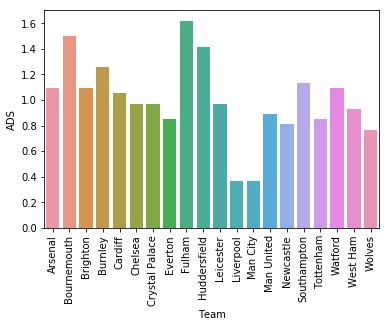

In [74]:
### Plotting the results in a nice bar chart ###

has_plot = sns.barplot(table.Team,table.ADS) # Home Goals Scored
for item in has_plot.get_xticklabels():
    item.set_rotation(90) # so that the x-axis labels are readable

In [16]:
### Man United Stats ###

table[table.Team == "Man United"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
13,Man United,30.0,30.0,1.214575,1.530612,19.0,22.0,0.969388,0.890688


In [17]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

### Creating a feature table ###
# We will only add HAS, HDS, AAS, ADS since they are the immediate result of HGS, HGC, AGS, AGC

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
f_HGS = []
f_HGC = []
f_AGS = []
f_AGC = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])
    f_HGS.append(table[table['Team'] == row['HomeTeam']]['HGS'].values[0])
    f_HGC.append(table[table['Team'] == row['HomeTeam']]['HGC'].values[0])
    f_AGS.append(table[table['Team'] == row['AwayTeam']]['AGS'].values[0])
    f_AGC.append(table[table['Team'] == row['AwayTeam']]['HGC'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table['HGS'] = f_HGS
feature_table['HGC'] = f_HGC
feature_table['AGS'] = f_AGS
feature_table['AGC'] = f_AGC


feature_table.head(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC
0,Man United,Leicester,H,6.0,4.0,1.214575,0.969388,1.071429,0.971660,30.0,19.0,21.0,19.0
1,Bournemouth,Cardiff,H,4.0,1.0,1.133603,1.071429,0.459184,1.052632,28.0,21.0,9.0,33.0
2,Fulham,Crystal Palace,A,6.0,9.0,0.769231,1.632653,1.275510,0.971660,19.0,32.0,25.0,17.0
3,Huddersfield,Chelsea,A,1.0,4.0,0.283401,1.224490,1.173469,0.971660,7.0,24.0,23.0,10.0
4,Newcastle,Tottenham,A,2.0,5.0,0.769231,1.020408,1.683673,0.850202,19.0,20.0,33.0,13.0
5,Watford,Brighton,H,5.0,0.0,0.769231,0.969388,0.765306,1.093117,19.0,19.0,15.0,16.0
6,Wolves,Everton,D,4.0,5.0,0.890688,0.969388,1.122449,0.850202,22.0,19.0,22.0,21.0
7,Arsenal,Man City,A,3.0,8.0,1.497976,0.612245,1.428571,0.364372,37.0,12.0,28.0,12.0
8,Liverpool,West Ham,H,8.0,2.0,1.862348,0.510204,0.714286,0.931174,46.0,10.0,14.0,25.0
9,Southampton,Burnley,D,3.0,6.0,0.769231,1.122449,0.816327,1.255061,19.0,22.0,16.0,28.0


In [18]:
### Representing the result as an integer ### -- this will be the y

def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [19]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [20]:
pred_table = feature_table.tail(10)
feature_table = feature_table[:-10] ### Removing last week so we can predict it

feature_table.tail(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
289,Cardiff,West Ham,H,7.0,2.0,0.769231,1.683673,0.714286,0.931174,19.0,33.0,14.0,25.0,1
290,Crystal Palace,Brighton,A,3.0,3.0,0.526316,0.867347,0.765306,1.093117,13.0,17.0,15.0,16.0,-1
291,Huddersfield,Bournemouth,A,1.0,5.0,0.283401,1.224490,0.765306,1.497976,7.0,24.0,15.0,21.0,-1
292,Leicester,Fulham,H,8.0,3.0,0.850202,0.969388,0.510204,1.619433,21.0,19.0,10.0,32.0,1
293,Man City,Watford,H,9.0,1.0,2.145749,0.612245,1.224490,1.093117,53.0,12.0,24.0,19.0,1
294,Newcastle,Everton,H,7.0,3.0,0.769231,1.020408,1.122449,0.850202,19.0,20.0,22.0,21.0,1
295,Southampton,Tottenham,H,4.0,5.0,0.769231,1.122449,1.683673,0.850202,19.0,22.0,33.0,13.0,1
296,Arsenal,Man United,H,3.0,4.0,1.497976,0.612245,1.530612,0.890688,37.0,12.0,30.0,19.0,1
297,Chelsea,Wolves,D,6.0,1.0,1.174089,0.510204,0.816327,0.769231,29.0,10.0,16.0,19.0,0
298,Liverpool,Burnley,H,5.0,2.0,1.862348,0.510204,0.816327,1.255061,46.0,10.0,16.0,28.0,1


In [21]:
pred_table

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
304,Brighton,Southampton,A,1.0,2.0,0.688259,0.816327,0.816327,1.133603,17.0,16.0,16.0,22.0,-1
305,Burnley,Wolves,H,1.0,1.0,0.850202,1.428571,0.816327,0.769231,21.0,28.0,16.0,19.0,1
306,Crystal Palace,Huddersfield,H,5.0,5.0,0.526316,0.867347,0.561224,1.417004,13.0,17.0,11.0,24.0,1
307,Fulham,Man City,A,0.0,7.0,0.769231,1.632653,1.428571,0.364372,19.0,32.0,28.0,12.0,-1
308,Leicester,Bournemouth,H,4.0,2.0,0.850202,0.969388,0.765306,1.497976,21.0,19.0,15.0,21.0,1
309,Man United,Watford,H,5.0,8.0,1.214575,0.969388,1.224490,1.093117,30.0,19.0,24.0,19.0,1
310,West Ham,Everton,A,1.0,9.0,1.093117,1.275510,1.122449,0.850202,27.0,25.0,22.0,21.0,-1
311,Cardiff,Chelsea,A,3.0,3.0,0.769231,1.683673,1.173469,0.971660,19.0,33.0,23.0,10.0,-1
312,Liverpool,Tottenham,H,3.0,2.0,1.862348,0.510204,1.683673,0.850202,46.0,10.0,33.0,13.0,1
313,Arsenal,Newcastle,NaN,NaN,NaN,1.497976,0.612245,0.612245,0.809717,37.0,12.0,12.0,20.0,0


# Training the data

In [22]:
### Setting the parameters and the result for our model ###

from sklearn.model_selection import train_test_split

X = feature_table[['HST','AST','HAS','HDS','AAS','ADS','HGS','HGC','AGS','AGC']]
y = feature_table['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
### Printing the shapes ###

print(X_train.shape, X_test.shape)

(228, 10) (76, 10)


In [24]:
### Importing machine learning Classifiers ###

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [25]:
### Comparing 4 Classifiers and their accuracies ###

RFC = RandomForestClassifier()
MNB = MultinomialNB()
XGB = XGBClassifier()
SVC = LinearSVC()

In [26]:
### SVC ### -- changes a lot

y_pred = SVC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = SVC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(SVC, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.5394736842105263
Train Accuracy score:  0.618421052631579
[0.58064516 0.67741935 0.64516129 0.61290323 0.67741935 0.58064516
 0.63333333 0.5        0.62068966 0.55172414]
Mean accuracy score:
0.6079940674823879


In [27]:
### RFC ### -- Train accuracy is maybe overfitted here
y_pred = RFC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = RFC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(RFC, X, y, cv=10)
print(scores)
print("Mean accuracy score:")
print(scores.mean())



Test Accuracy score:  0.4868421052631579
Train Accuracy score:  0.9824561403508771
[0.61290323 0.58064516 0.64516129 0.61290323 0.5483871  0.51612903
 0.53333333 0.5        0.62068966 0.65517241]
Mean accuracy score:
0.5825324434556914


In [28]:
### XGB ### -- a very good accuracy

y_pred = XGB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = XGB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(XGB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.5526315789473685
Train Accuracy score:  0.8771929824561403
[0.61290323 0.58064516 0.58064516 0.61290323 0.51612903 0.58064516
 0.53333333 0.5        0.65517241 0.65517241]
Mean accuracy score:
0.5827549128661476


In [29]:
### MNB ### -- all accuracies not bad either

y_pred = MNB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = MNB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(MNB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.5657894736842105
Train Accuracy score:  0.631578947368421
[0.67741935 0.67741935 0.51612903 0.61290323 0.51612903 0.64516129
 0.5        0.6        0.5862069  0.65517241]
Mean accuracy score:
0.5986540600667407


# Improvements

## Adding past games statistics (goals, shots, corners)

In [30]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]
feat_table.head()

# TODO: add shots on target, fouls, yellow and red cards

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
313,Arsenal,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,Liverpool,Tottenham,H,2.0,1.0,14.0,11.0,10.0,3.0
311,Cardiff,Chelsea,A,1.0,2.0,8.0,21.0,2.0,7.0
310,West Ham,Everton,A,0.0,2.0,3.0,17.0,4.0,9.0
309,Man United,Watford,H,2.0,1.0,8.0,20.0,3.0,5.0


In [31]:
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,37.0,26.0,1.497976,1.326531,12.0,27.0,0.612245,1.093117
1,Bournemouth,28.0,15.0,1.133603,0.765306,21.0,37.0,1.071429,1.497976
2,Brighton,17.0,15.0,0.688259,0.765306,16.0,27.0,0.816327,1.093117
3,Burnley,21.0,16.0,0.850202,0.816327,28.0,31.0,1.428571,1.255061
4,Cardiff,19.0,9.0,0.769231,0.459184,33.0,26.0,1.683673,1.052632
5,Chelsea,29.0,23.0,1.174089,1.173469,10.0,24.0,0.510204,0.971660
6,Crystal Palace,13.0,25.0,0.526316,1.275510,17.0,24.0,0.867347,0.971660
7,Everton,23.0,22.0,0.931174,1.122449,21.0,21.0,1.071429,0.850202
8,Fulham,19.0,10.0,0.769231,0.510204,32.0,40.0,1.632653,1.619433
9,Huddersfield,7.0,11.0,0.283401,0.561224,24.0,35.0,1.224490,1.417004


In [32]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Chelsea','West Ham','D',0,0,0,0,0,0],
                             ['Everton','Arsenal','D',0,0,0,0,0,0],
                             ['Bournemouth','Burnley','D',0,0,0,0,0,0],
                             ['Newcastle','Crystal Palace','D',0,0,0,0,0,0],
                             ['Huddersfield','Leicester','D',0,0,0,0,0,0],
                             ['Southampton','Liverpool','D',0,0,0,0,0,0],
                             ['Man City','Cardiff','D',0,0,0,0,0,0],
                             ['Tottenham','Crystal Palace','D',0,0,0,0,0,0],
                             ['Chelsea','Brighton','D',0,0,0,0,0,0],
                             ['Watford','Fulham','D',0,0,0,0,0,0],
                             ['Wolves','Man United','D',0,0,0,0,0,0]],columns=feat_table.columns)


new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
324,Chelsea,West Ham,D,0.0,0.0,0.0,0.0,0.0,0.0
323,Everton,Arsenal,D,0.0,0.0,0.0,0.0,0.0,0.0
322,Bournemouth,Burnley,D,0.0,0.0,0.0,0.0,0.0,0.0
321,Newcastle,Crystal Palace,D,0.0,0.0,0.0,0.0,0.0,0.0
320,Huddersfield,Leicester,D,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
feat_table = new_feat_table
feat_table.shape

(325, 9)

In [34]:
# Past Home Shots, Home Corners, Home Goals...

# Adding k recent performance measures
feat_table["past_HS"] = 0.0
feat_table["past_HC"] = 0.0
feat_table["past_AS"] = 0.0
feat_table["past_AC"] = 0.0
feat_table["past_HG"] = 0.0
feat_table["past_AG"] = 0.0

In [35]:
feat_table.head(12)


,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG
324,Chelsea,West Ham,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,Everton,Arsenal,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,Bournemouth,Burnley,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
321,Newcastle,Crystal Palace,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,Huddersfield,Leicester,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,Southampton,Liverpool,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,Man City,Cardiff,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,Tottenham,Crystal Palace,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,Chelsea,Brighton,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,Watford,Fulham,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
### testing
for index,row in feat_table.iterrows():
    print (row['HomeTeam'], table[table['Team'] == row['HomeTeam']]['HAS'].values)

Chelsea [1.17408907]
Everton [0.93117409]
Bournemouth [1.13360324]
Newcastle [0.76923077]
Huddersfield [0.28340081]
Southampton [0.76923077]
Man City [2.14574899]
Tottenham [1.01214575]
Chelsea [1.17408907]
Watford [0.76923077]
Wolves [0.89068826]
Arsenal [1.49797571]
Liverpool [1.86234818]
Cardiff [0.76923077]
West Ham [1.09311741]
Man United [1.2145749]
Leicester [0.85020243]
Fulham [0.76923077]
Crystal Palace [0.52631579]
Burnley [0.85020243]
Brighton [0.68825911]
Fulham [0.76923077]
Everton [0.93117409]
West Ham [1.09311741]
Burnley [0.85020243]
Bournemouth [1.13360324]
Liverpool [1.86234818]
Chelsea [1.17408907]
Arsenal [1.49797571]
Southampton [0.76923077]
Newcastle [0.76923077]
Man City [2.14574899]
Leicester [0.85020243]
Huddersfield [0.28340081]
Crystal Palace [0.52631579]
Cardiff [0.76923077]
Watford [0.76923077]
Fulham [0.76923077]
Everton [0.93117409]
Wolves [0.89068826]
West Ham [1.09311741]
Tottenham [1.01214575]
Man United [1.2145749]
Burnley [0.85020243]
Brighton [0.688

In [37]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)
    feat_table.set_value(i, 'past_HC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'past_AC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'past_HS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'past_AS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'past_HG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'past_AG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)
    
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS   



In [38]:
feat_table.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
324,Chelsea,West Ham,D,0.0,0.0,0.0,0.0,0.0,0.0,6.25,4.50,16.25,4.25,0.75,1.5,1.174089,0.510204,1.173469,0.971660
323,Everton,Arsenal,D,0.0,0.0,0.0,0.0,0.0,0.0,12.00,4.50,9.25,4.25,1.50,2.0,0.931174,1.071429,1.122449,0.850202
322,Bournemouth,Burnley,D,0.0,0.0,0.0,0.0,0.0,0.0,15.25,4.50,12.50,6.25,1.00,1.5,1.133603,1.071429,0.765306,1.497976
321,Newcastle,Crystal Palace,D,0.0,0.0,0.0,0.0,0.0,0.0,6.75,3.75,9.25,5.25,1.25,1.5,0.769231,1.020408,0.612245,0.809717
320,Huddersfield,Leicester,D,0.0,0.0,0.0,0.0,0.0,0.0,14.00,5.50,8.25,5.50,0.75,2.0,0.283401,1.224490,0.561224,1.417004


In [39]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)
test_table.head()

,HomeTeam,AwayTeam,FTR,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
324,Chelsea,West Ham,D,6.25,4.50,16.25,4.25,0.75,1.5,1.174089,0.510204,1.173469,0.971660
323,Everton,Arsenal,D,12.00,4.50,9.25,4.25,1.50,2.0,0.931174,1.071429,1.122449,0.850202
322,Bournemouth,Burnley,D,15.25,4.50,12.50,6.25,1.00,1.5,1.133603,1.071429,0.765306,1.497976
321,Newcastle,Crystal Palace,D,6.75,3.75,9.25,5.25,1.25,1.5,0.769231,1.020408,0.612245,0.809717
320,Huddersfield,Leicester,D,14.00,5.50,8.25,5.50,0.75,2.0,0.283401,1.224490,0.561224,1.417004


In [40]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [41]:
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(325, 19)


315

In [42]:
X_train = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

# Adding additional improvements - home advantage

In [55]:
test_table["pastCornerDiff"] = (test_table["past_HC"] - test_table["past_AC"])/k
test_table["pastGoalDiff"] = (test_table["past_HG"] - test_table["past_AG"])/k
test_table["pastShotsDiff"] = (test_table["past_HS"] - test_table["past_AG"])/k

In [56]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-12
print(num_games)
v_split = 15
n_games = num_games - v_split
n_games # for validation purposes

313


298

In [57]:
test_table = test_table.fillna(0)
test_table.tail()

,HomeTeam,AwayTeam,FTR,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
320,Huddersfield,Leicester,D,14.00,5.50,8.25,5.50,0.75,2.0,0.283401,1.224490,0.561224,1.417004,0,0.0000,-0.3125,3.0000
321,Newcastle,Crystal Palace,D,6.75,3.75,9.25,5.25,1.25,1.5,0.769231,1.020408,0.612245,0.809717,0,-0.3750,-0.0625,1.3125
322,Bournemouth,Burnley,D,15.25,4.50,12.50,6.25,1.00,1.5,1.133603,1.071429,0.765306,1.497976,0,-0.4375,-0.1250,3.4375
323,Everton,Arsenal,D,12.00,4.50,9.25,4.25,1.50,2.0,0.931174,1.071429,1.122449,0.850202,0,0.0625,-0.1250,2.5000
324,Chelsea,West Ham,D,6.25,4.50,16.25,4.25,0.75,1.5,1.174089,0.510204,1.173469,0.971660,0,0.0625,-0.1875,1.1875


In [58]:
### Is this manipulation needed?
X_train_0 = test_table[['past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train_0 = test_table['Result'].loc[0:num_games]
X_predict_0 = test_table[['past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[num_games:]

test_table.drop(['past_HC','past_AS','past_AC','past_HG','past_AG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [59]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
313,0.2500,0.1875,2.5000,1.497976,0.612245,1.326531,1.093117
314,0.1250,-0.3125,2.8750,0.890688,0.969388,0.816327,0.769231
315,0.4375,0.0625,3.5625,0.769231,0.969388,1.224490,1.093117
316,-0.0625,0.0625,2.0625,1.174089,0.510204,1.173469,0.971660
317,-0.6250,-0.2500,2.4375,1.012146,0.663265,1.683673,0.850202
318,0.1250,0.2500,0.3750,2.145749,0.612245,1.428571,0.364372
319,0.1250,-0.0625,3.2500,0.769231,1.122449,0.816327,1.133603
320,0.0000,-0.3125,3.0000,0.283401,1.224490,0.561224,1.417004
321,-0.3750,-0.0625,1.3125,0.769231,1.020408,0.612245,0.809717
322,-0.4375,-0.1250,3.4375,1.133603,1.071429,0.765306,1.497976


In [60]:
### SVC ###

y_pred = SVC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = SVC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(SVC, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.8
Train Accuracy score:  0.5618729096989966
[0.61290323 0.64516129 0.48387097 0.5483871  0.61290323 0.5483871
 0.46666667 0.6        0.65517241 0.75862069]
Mean accuracy score:
0.5932072673340748


# Optimizing for the best value of k


In [61]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)
    
# Random Forest Classifier
plot_scores_RFC = []
for i in range(1,100):
    clf_RFC = RandomForestClassifier(n_estimators=i)
    clf_RFC.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_RFC.predict(X_test))
    plot_scores_RFC.append(scores)
    


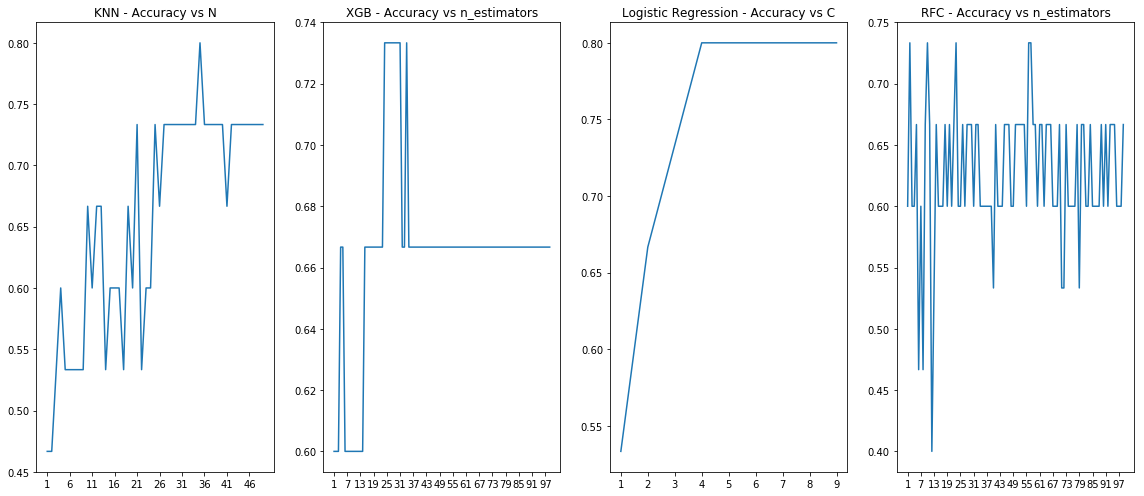

In [62]:
### Plotting the results ###

fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,4,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,4,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,4,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

ax4 = fig.add_subplot(1,4,4)
ax4.plot(range(1,100),plot_scores_RFC);
ax4.set_xticks(range(1,100,6));
ax4.set_title("RFC - Accuracy vs n_estimators")

fig.tight_layout()

In [63]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

max_RFC_e = max(plot_scores_RFC)
max_RFC_ind = plot_scores_RFC.index(max_RFC_e)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)
print(max_RFC_e, max_RFC_ind)


0.8 34
0.7333333333333333 23
0.8 3
0.7333333333333333 1


In [64]:
### Training the classifiers ###

KNN = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
LOGREG = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)
RFC = RandomForestClassifier(n_estimators=max_RFC_ind).fit(X_train, y_train)
SVC = LinearSVC().fit(X_train, y_train)
MNB = MultinomialNB().fit(X_train_0, y_train_0) # -- do not use difference but just these HC and AC -- doesnt take negative values

In [65]:
y_pred_knn = KNN.predict(X_predict)
y_pred_XGB = XGB.predict(X_predict)
y_pred_logreg = LOGREG.predict(X_predict)
y_pred_rfc = RFC.predict(X_predict)
y_pred_svc = SVC.predict(X_predict)
y_pred_mnb = MNB.predict(X_predict_0)

In [66]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg
this_week['Result_rfc']=y_pred_rfc
this_week['Result_svc']=y_pred_svc
this_week['Result_mnb']=y_pred_mnb
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg,Result_rfc,Result_svc,Result_mnb
313,Arsenal,Newcastle,1,1,1,1,1,1
314,Wolves,Man United,-1,-1,-1,1,-1,1
315,Watford,Fulham,1,1,1,1,1,1
316,Chelsea,Brighton,1,1,1,0,1,1
317,Tottenham,Crystal Palace,1,-1,1,0,1,1
318,Man City,Cardiff,1,1,1,1,1,1
319,Southampton,Liverpool,0,-1,-1,0,-1,-1
320,Huddersfield,Leicester,-1,-1,-1,-1,-1,-1
321,Newcastle,Crystal Palace,-1,-1,-1,-1,-1,1
322,Bournemouth,Burnley,1,0,1,1,1,1


In [67]:
### Transforming the columns back ###

def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [68]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)
this_week["Res_rfc"] = this_week.apply(lambda row: transformResultBack(row,"Result_rfc"),axis=1)
this_week["Res_svc"] = this_week.apply(lambda row: transformResultBack(row,"Result_svc"),axis=1)
this_week["Res_mnb"] = this_week.apply(lambda row: transformResultBack(row,"Result_mnb"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg","Result_rfc","Result_svc","Result_mnb"],axis=1,inplace=True)

In [69]:
this_week

,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg,Res_rfc,Res_svc,Res_mnb
313,Arsenal,Newcastle,H,H,H,H,H,H
314,Wolves,Man United,A,A,A,H,A,H
315,Watford,Fulham,H,H,H,H,H,H
316,Chelsea,Brighton,H,H,H,D,H,H
317,Tottenham,Crystal Palace,H,A,H,D,H,H
318,Man City,Cardiff,H,H,H,H,H,H
319,Southampton,Liverpool,D,A,A,D,A,A
320,Huddersfield,Leicester,A,A,A,A,A,A
321,Newcastle,Crystal Palace,A,A,A,A,A,H
322,Bournemouth,Burnley,H,D,H,H,H,H


In [ ]:
"""
Amal Predictions: | Google:
Man Utd | Man Utd
Watford | Watford
Chelsea | Chelsea
Tottenham | Tottenham
Man City | Man City
Southampton draw | Liverpool
Leicester | Leicester
Newcastle draw | Newcastle
Bournemouth | Bournemouth
Everton draw | Arsenal
Chelsea | Chelsea
"""

In [1]:
"""
1 - correct
0 - incorrect
Results | My pred | Amal pred :
Wolves | 0 | 0
Watford | 1 | 1
Chelsea | 1 | 1
Tottenham | 1 | 1
Man City | 1 | 1
Liverpool | 1 | 0
Leicester | 1 | 1
Crystal Palace | 1 | 0
Burnley | 0 | 0


Total: 15/19 | 9/19
"""

'\n1 - correct\n0 - incorrect\nResults | My pred | Amal pred :\nFulham | 1 | 1\nCrystal Palace | 1 | 0\nLeicester | 1 | 0\nMan United | 1 | 1\nBurnley | 0 | 0\nSouthampton | 1 | 1\n\nTotal: 5/6 | 3/6\n'

In [2]:
"""
Models:
kNN: 11/19
XGB: 14/19
logreg: 15/19
rfc: 11/19
svc: 14/19
mnb: 15/19 

"""

'\nModels:\nkNN: 2/6\nXGB: 5/6\nlogreg: 5/6\nrfc: 3/6\nsvc: 4/6\nmnb: 5/6 \n\n'